# **CASE: OTIMIZAÇÃO DE ROTAS**

---

### Instalação de bibliotecas

In [1]:
# Para análises de dados em formato de rede/grafo
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Carregamento de bibliotecas

In [2]:
library(igraph)
library(RColorBrewer) # já pré-instalado


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




### Leitura da base de dados

In [3]:
dados_rotas <- read.table(file   = "../Dados/Otimizacao_Rotas.txt",
                          sep    = "\t",
                          header = TRUE)

### Visualização da base de dados

In [4]:
View(dados_rotas)

ORIGEM,DESTINO,CUSTO
<chr>,<chr>,<int>
A,C,14
A,D,14
A,E,35
A,F,25
B,C,29
B,E,17
B,G,37
C,D,22
C,K,16


### Criação da rede e objetos auxiliares

In [5]:
# Criação de grafo
rede <- graph_from_data_frame(dados_rotas, directed = FALSE)

In [6]:
# Arestas
arestas <- E(rede)
arestas

+ 22/22 edges from 5085484 (vertex names):
 [1] A--C A--D A--E A--F B--C B--E B--G C--D C--K D--K E--M F--G F--K G--H G--I
[16] G--L I--H I--O J--K K--O L--H N--O

In [7]:
# Custos associados às arestas
custos <- arestas$CUSTO
custos

[1] 14 14 35 25 29 17 37 22 16 42 38 39 15 12 35 13 18 24 22 17 28 16

In [8]:
# Matriz de adjacências
matriz_adj <- as_adjacency_matrix(rede, attr = "CUSTO")
matriz_adj

  [[ suppressing 15 column names ‘A’, ‘B’, ‘C’ ... ]]



15 x 15 sparse Matrix of class "dgCMatrix"
                                              
A  .  . 14 14 35 25  .  .  .  .  .  .  .  .  .
B  .  . 29  . 17  . 37  .  .  .  .  .  .  .  .
C 14 29  . 22  .  .  .  .  . 16  .  .  .  .  .
D 14  . 22  .  .  .  .  .  . 42  .  .  .  .  .
E 35 17  .  .  .  .  .  .  .  .  .  . 38  .  .
F 25  .  .  .  .  . 39  .  . 15  .  .  .  .  .
G  . 37  .  .  . 39  . 35  .  . 13  .  . 12  .
I  .  .  .  .  .  . 35  .  .  .  .  .  . 18 24
J  .  .  .  .  .  .  .  .  . 22  .  .  .  .  .
K  .  . 16 42  . 15  .  . 22  .  .  .  .  . 17
L  .  .  .  .  .  . 13  .  .  .  .  .  . 28  .
N  .  .  .  .  .  .  .  .  .  .  .  .  .  . 16
M  .  .  .  . 38  .  .  .  .  .  .  .  .  .  .
H  .  .  .  .  .  . 12 18  .  . 28  .  .  .  .
O  .  .  .  .  .  .  . 24  . 17  . 16  .  .  .

### Análise visual da rede

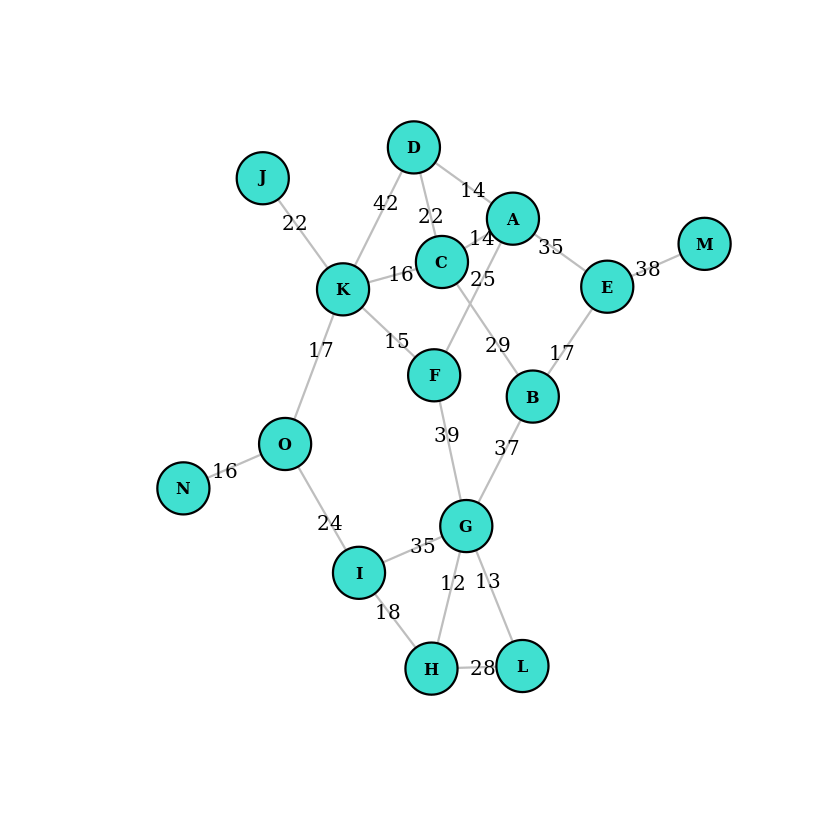

In [9]:
# Visualização da rede
plot.igraph(rede,
            layout             = layout_with_kk, # layout de disposição dos nós
            vertex.color       = "turquoise",    # cor de preenchimento dos nós
            vertex.size        = 20,             # tamanho dos nós
            vertex.shape       = "circle",       # formato dos nós
            vertex.label.color = "black",        # cor da fonte dos nós
            vertex.label.cex   = 0.8,            # tamanho da fonte dos nós
            vertex.label.font  = 2,              # tipo de fonte dos nós
            vertex.frame.width = 1.8,            # largura da borda dos nós
            edge.color         = "gray",         # cor das arestas
            edge.width         = 1.8,            # largura das arestas
            edge.label         = custos,         # rótulos das arestas (custos)
            edge.label.cex     = 1,              # tamanho da fonte das arestas
            edge.label.color   = "black",        # cor da fonte das arestas
            edge.label.font    = 1)              # tipo de fonte das arestas

In [10]:
# Para consultar mais opções de parâmetros gráficos do pacote igraph, acesse:
# https://igraph.org/r/doc/plot.common.html

### Análise de coesão

In [11]:
# Distância geodésica média: média das menores distâncias entre todos os pares de nós
mean_distance(rede)

[1] 2.457143

In [12]:
# Custo médio: médias dos custos associado às distâncias geodésicas entre todos os pares de nós
mean_distance(rede, weights = custos)

[1] 57.01905

In [13]:
# Diâmetro da rede: maior distância geodésica entre todos os pares de nós
diameter(rede)

[1] 6

In [14]:
# Custo diametral da rede: maior custo associado às distâncias geodésicas entre todos os pares de nós
diameter(rede, weights = custos)

[1] 133

In [15]:
# Densidade: proporção de arestas presentes, em relação ao total possível de arestas
edge_density(rede)

[1] 0.2095238

In [48]:
# Transitividade: proporção de triângulos presentes, em relação ao total possível de triângulos
transitivity(rede, type = "global")

[1] 0.2222222

### Identificação de melhores caminhos

In [17]:
# Matriz de distâncias geodésicas entre todos os pares de nós
distances(rede)

,A,B,C,D,E,F,G,I,J,K,L,N,M,H,O
A,0,2,1,1,1,1,2,3,3,2,3,4,2,3,3
B,2,0,1,2,1,2,1,2,3,2,2,4,2,2,3
C,1,1,0,1,2,2,2,3,2,1,3,3,3,3,2
D,1,2,1,0,2,2,3,3,2,1,4,3,3,4,2
E,1,1,2,2,0,2,2,3,4,3,3,5,1,3,4
F,1,2,2,2,2,0,1,2,2,1,2,3,3,2,2
G,2,1,2,3,2,1,0,1,3,2,1,3,3,1,2
I,3,2,3,3,3,2,1,0,3,2,2,2,4,1,1
J,3,3,2,2,4,2,3,3,0,1,4,3,5,4,2
K,2,2,1,1,3,1,2,2,1,0,3,2,4,3,1


In [18]:
# Matriz de custos associados às distâncias geodésicas entre todos os pares de nós
distances(rede, weights = custos)

,A,B,C,D,E,F,G,I,J,K,L,N,M,H,O
A,0,43,14,14,35,25,64,71,52,30,77,63,73,76,47
B,43,0,29,51,17,60,37,67,67,45,50,78,55,49,62
C,14,29,0,22,46,31,66,57,38,16,79,49,84,75,33
D,14,51,22,0,49,39,78,79,60,38,91,71,87,90,55
E,35,17,46,49,0,60,54,84,84,62,67,95,38,66,79
F,25,60,31,39,60,0,39,56,37,15,52,48,98,51,32
G,64,37,66,78,54,39,0,30,76,54,13,70,92,12,54
I,71,67,57,79,84,56,30,0,63,41,43,40,122,18,24
J,52,67,38,60,84,37,76,63,0,22,89,55,122,81,39
K,30,45,16,38,62,15,54,41,22,0,67,33,100,59,17


In [58]:
# ATENÇÃO! Especifique um nó de origem e um nó de destino para realizar as análises dos blocos a seguir
ORIGEM  = "I"   # exemplo: "I"
DESTINO = "G"   # exemplo: "G"

In [59]:
# Menor caminho entre os nós especificados (em comprimento)
menor_caminho <- shortest_paths(rede,
                                from = ORIGEM,
                                to = DESTINO)$vpath[[1]]
menor_caminho

+ 2/15 vertices, named, from 5085484:
[1] I G

In [60]:
# Comprimento associado ao menor caminho (em comprimento)
sum(lengths(menor_caminho))-1

[1] 1

In [61]:
# Custo associado ao menor caminho (em comprimento)
sum(E(rede, path = menor_caminho)$CUSTO)

[1] 35

In [62]:
# Menor caminho de um nó a outro (em custo)
menor_caminho <- shortest_paths(rede,
                                from = ORIGEM,
                                to = DESTINO,
                                weights = custos)$vpath[[1]]
menor_caminho

+ 3/15 vertices, named, from 5085484:
[1] I H G

In [63]:
# Comprimento associado ao menor caminho (em custo)
sum(lengths(menor_caminho))-1

[1] 2

In [64]:
# Custo associado ao menor caminho (em custo)
sum(E(rede, path = menor_caminho)$CUSTO)

[1] 30

In [68]:
# Lista de todos os caminhos que ligam dois nós
all_simple_paths(rede, from = ORIGEM, to = DESTINO)

[[1]]
+ 2/15 vertices, named, from 5085484:
[1] I G

[[2]]
+ 3/15 vertices, named, from 5085484:
[1] I H G

[[3]]
+ 4/15 vertices, named, from 5085484:
[1] I H L G

[[4]]
+ 8/15 vertices, named, from 5085484:
[1] I O K C A E B G

[[5]]
+ 7/15 vertices, named, from 5085484:
[1] I O K C A F G

[[6]]
+ 9/15 vertices, named, from 5085484:
[1] I O K C B E A F G

[[7]]
+ 6/15 vertices, named, from 5085484:
[1] I O K C B G

[[8]]
+ 9/15 vertices, named, from 5085484:
[1] I O K C D A E B G

[[9]]
+ 8/15 vertices, named, from 5085484:
[1] I O K C D A F G

[[10]]
+ 8/15 vertices, named, from 5085484:
[1] I O K D A C B G

[[11]]
+ 8/15 vertices, named, from 5085484:
[1] I O K D A E B G

[[12]]
+ 7/15 vertices, named, from 5085484:
[1] I O K D A F G

[[13]]
+ 9/15 vertices, named, from 5085484:
[1] I O K D C A E B G

[[14]]
+ 8/15 vertices, named, from 5085484:
[1] I O K D C A F G

[[15]]
+ 10/15 vertices, named, from 5085484:
 [1] I O K D C B E A F G

[[16]]
+ 7/15 vertices, named, from 5085484:


In [67]:
# Lista de todos os caminhos que ligam dois nós, com determinado comprimento máximo (por exemplo, 4)
all_simple_paths(rede, from = ORIGEM, to = DESTINO, cutoff = 4)

[[1]]
+ 2/15 vertices, named, from 5085484:
[1] I G

[[2]]
+ 3/15 vertices, named, from 5085484:
[1] I H G

[[3]]
+ 4/15 vertices, named, from 5085484:
[1] I H L G

[[4]]
+ 5/15 vertices, named, from 5085484:
[1] I O K F G


### Medidas de centralidade

In [28]:
# Definição de ordem dos nós, apenas para facilitar a visualização
ordem <- c("A","B","C","D","E","F","G","H","I","J","K","L","M","N","O")

In [29]:
# Centralidade de grau
as.data.frame(degree(rede)[ordem])

,degree(rede)[ordem]
,<dbl>
A,4
B,3
C,4
D,3
E,3
F,3
G,5
H,3
I,3


In [30]:
# Centralidade de proximidade
as.data.frame(round(closeness(rede),3)[ordem])

,"round(closeness(rede), 3)[ordem]"
,<dbl>
A,0.032
B,0.034
C,0.034
D,0.030
E,0.028
F,0.037
G,0.037
H,0.028
I,0.031


In [31]:
# Centralidade de intermediação
as.data.frame(round(betweenness(rede),1)[ordem])

,"round(betweenness(rede), 1)[ordem]"
,<dbl>
A,12.3
B,16.0
C,10.4
D,3.1
E,13.5
F,14.0
G,26.5
H,1.5
I,9.1


### Detecção de comunidades

#### Algoritmo de Louvain

In [32]:
# Definição de semente aleatória, para reprodutibilidade dos resultados
set.seed(123)

In [33]:
# Execução do algoritmo
comunidades_louvain <- cluster_louvain(rede,
                                       weights = custos,
                                       resolution = 1)  # ajuda a controlar o tamanho dos clusters

In [34]:
# Comandos auxiliares para definir cores dos clusters, usando paleta personalizada
qtde_clusters <- length(comunidades_louvain)
cores <- colorRampPalette(brewer.pal(12, "Set3"))(qtde_clusters)
V(rede)$color <- cores[membership(comunidades_louvain)]

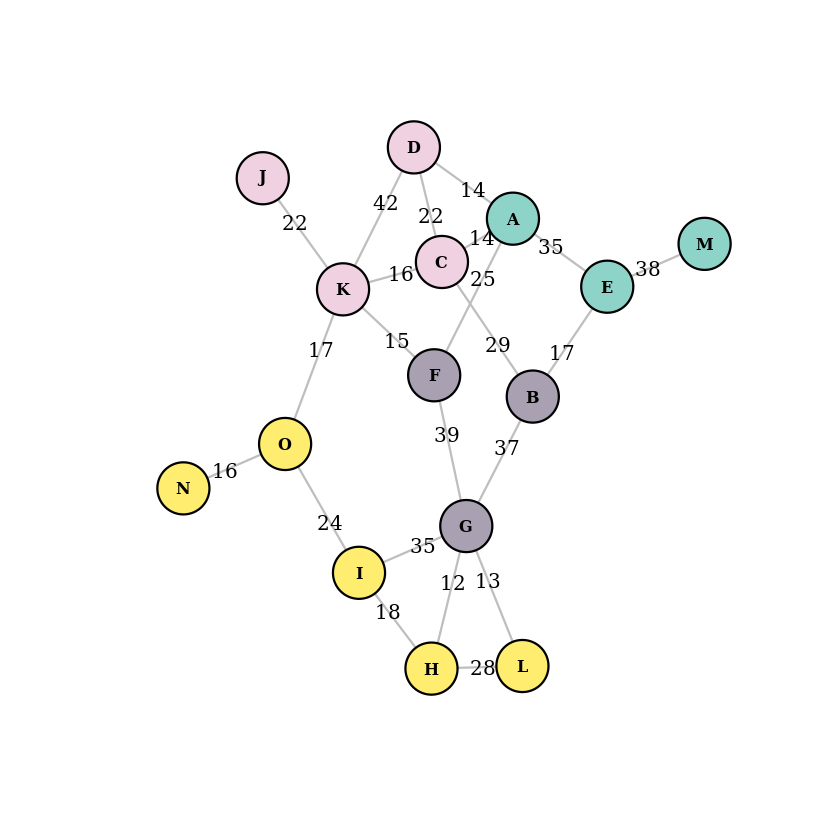

In [35]:
# Visualização dos clusters
plot(rede,
     layout             = layout_with_kk,       # layout de disposição dos nós
     vertex.color       = V(rede)$color,        # cor de preenchimento dos nós
     vertex.size        = 20,                   # tamanho dos nós
     vertex.shape       = "circle",             # formato dos nós
     vertex.label.color = "black",              # cor da fonte dos nós
     vertex.label.cex   = 0.8,                  # tamanho da fonte dos nós
     vertex.label.font  = 2,                    # tipo de fonte dos nós
     vertex.frame.width = 1.8,                  # largura da borda dos nós
     edge.color         = "gray",               # cor das arestas
     edge.width         = 1.8,                  # largura das arestas
     edge.label         = custos,               # rótulos das arestas (custos)
     edge.label.cex     = 1,                    # tamanho da fonte das arestas
     edge.label.color   = "black",              # cor da fonte das arestas
     edge.label.font    = 1)                    # tipo de fonte das arestas

#### Algoritmo Infomap

In [36]:
# Execução do algoritmo
comunidades_infomap <- cluster_infomap(rede, e.weights = custos)

In [37]:
# Comandos auxiliares para definir cores dos clusters, usando paleta personalizada
qtde_clusters <- length(comunidades_infomap)
cores <- colorRampPalette(brewer.pal(12, "Set3"))(qtde_clusters)
V(rede)$color <- cores[membership(comunidades_infomap)]

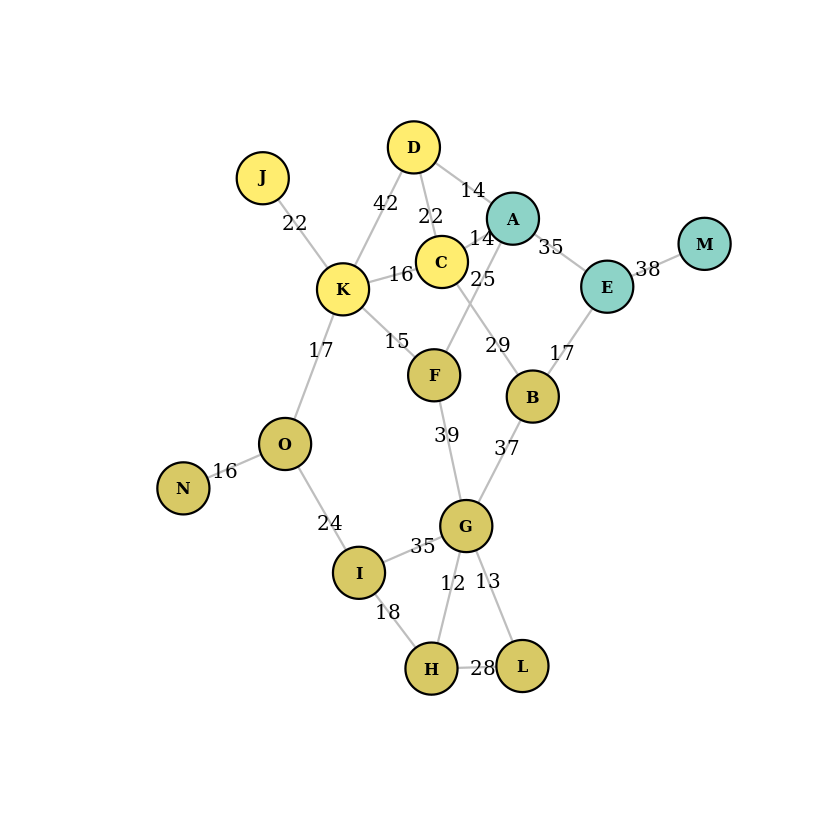

In [38]:
# Visualização dos clusters
plot(rede,
     layout             = layout_with_kk,       # layout de disposição dos nós
     vertex.color       = V(rede)$color,        # cor de preenchimento dos nós
     vertex.size        = 20,                   # tamanho dos nós
     vertex.shape       = "circle",             # formato dos nós
     vertex.label.color = "black",              # cor da fonte dos nós
     vertex.label.cex   = 0.8,                  # tamanho da fonte dos nós
     vertex.label.font  = 2,                    # tipo de fonte dos nós
     vertex.frame.width = 1.8,                  # largura da borda dos nós
     edge.color         = "gray",               # cor das arestas
     edge.width         = 1.8,                  # largura das arestas
     edge.label         = custos,               # rótulos das arestas (custos)
     edge.label.cex     = 1,                    # tamanho da fonte das arestas
     edge.label.color   = "black",              # cor da fonte das arestas
     edge.label.font    = 1)                    # tipo de fonte das arestas

#### Algoritmo Walktrap

In [39]:
# Execução do algoritmo
comunidades_walktrap <- cluster_walktrap(rede, weights = custos)

In [40]:
# Comandos auxiliares para definir cores dos clusters, usando paleta personalizada
qtde_clusters <- length(comunidades_walktrap)
cores <- colorRampPalette(brewer.pal(12, "Set3"))(qtde_clusters)
V(rede)$color <- cores[membership(comunidades_walktrap)]

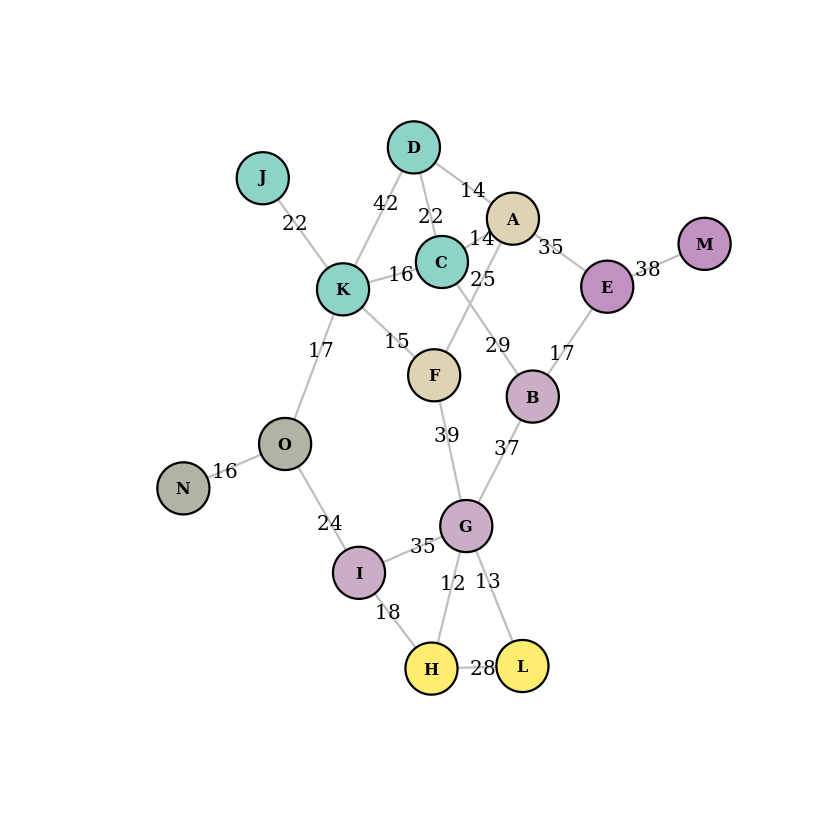

In [41]:
# Visualização dos clusters
plot(rede,
     layout             = layout_with_kk,       # layout de disposição dos nós
     vertex.color       = V(rede)$color,        # cor de preenchimento dos nós
     vertex.size        = 20,                   # tamanho dos nós
     vertex.shape       = "circle",             # formato dos nós
     vertex.label.color = "black",              # cor da fonte dos nós
     vertex.label.cex   = 0.8,                  # tamanho da fonte dos nós
     vertex.label.font  = 2,                    # tipo de fonte dos nós
     vertex.frame.width = 1.8,                  # largura da borda dos nós
     edge.color         = "gray",               # cor das arestas
     edge.width         = 1.8,                  # largura das arestas
     edge.label         = custos,               # rótulos das arestas (custos)
     edge.label.cex     = 1,                    # tamanho da fonte das arestas
     edge.label.color   = "black",              # cor da fonte das arestas
     edge.label.font    = 1)                    # tipo de fonte das arestas

#### Algoritmo Edge Betweenness

In [42]:
# Execução do algoritmo
comunidades_edge_betweenness <- cluster_edge_betweenness(rede, weights = custos)

Warning message in cluster_edge_betweenness(rede, weights = custos):
“At vendor/cigraph/src/community/edge_betweenness.c:497 : Membership vector will be selected based on the highest modularity score.”


In [43]:
# Comandos auxiliares para definir cores dos clusters, usando paleta personalizada
qtde_clusters <- length(comunidades_edge_betweenness)
cores <- colorRampPalette(brewer.pal(12, "Set3"))(qtde_clusters)
V(rede)$color <- cores[membership(comunidades_edge_betweenness)]

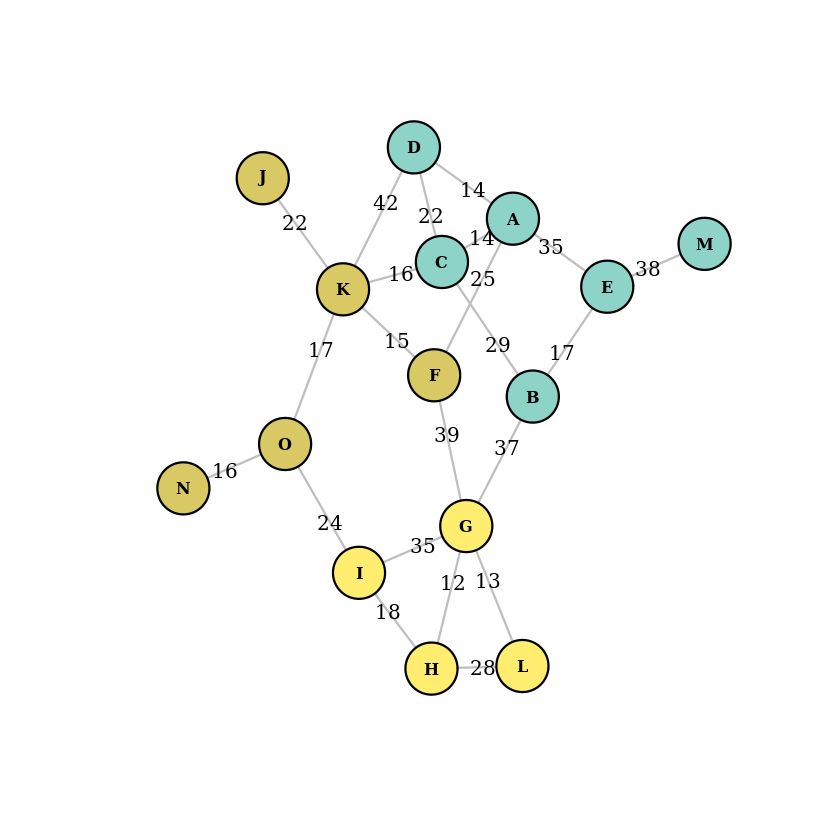

In [44]:
# Visualização dos clusters
plot(rede,
     layout             = layout_with_kk,       # layout de disposição dos nós
     vertex.color       = V(rede)$color,        # cor de preenchimento dos nós
     vertex.size        = 20,                   # tamanho dos nós
     vertex.shape       = "circle",             # formato dos nós
     vertex.label.color = "black",              # cor da fonte dos nós
     vertex.label.cex   = 0.8,                  # tamanho da fonte dos nós
     vertex.label.font  = 2,                    # tipo de fonte dos nós
     vertex.frame.width = 1.8,                  # largura da borda dos nós
     edge.color         = "gray",               # cor das arestas
     edge.width         = 1.8,                  # largura das arestas
     edge.label         = custos,               # rótulos das arestas (custos)
     edge.label.cex     = 1,                    # tamanho da fonte das arestas
     edge.label.color   = "black",              # cor da fonte das arestas
     edge.label.font    = 1)                    # tipo de fonte das arestas

#### Algoritmo Label Propagation

In [45]:
# Execução do algoritmo
comunidades_label_prop <- cluster_label_prop(rede, weights = custos)

In [46]:
# Comandos auxiliares para definir cores dos clusters, usando paleta personalizada
qtde_clusters <- length(comunidades_label_prop)
cores <- colorRampPalette(brewer.pal(12, "Set3"))(qtde_clusters)
V(rede)$color <- cores[membership(comunidades_label_prop)]

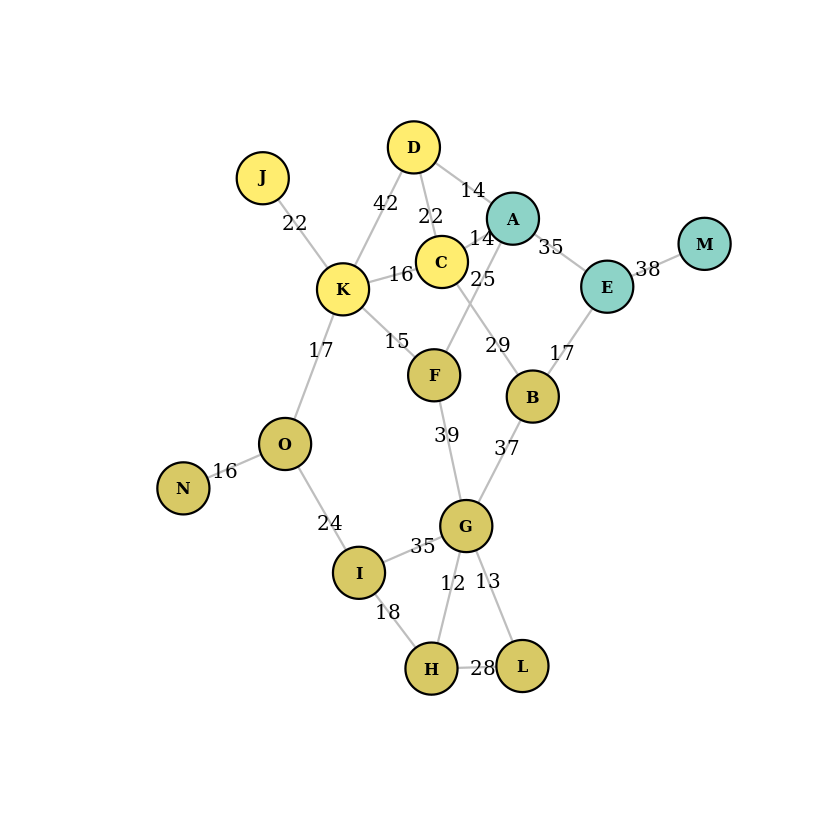

In [47]:
# Visualização dos clusters
plot(rede,
     layout             = layout_with_kk,       # layout de disposição dos nós
     vertex.color       = V(rede)$color,        # cor de preenchimento dos nós
     vertex.size        = 20,                   # tamanho dos nós
     vertex.shape       = "circle",             # formato dos nós
     vertex.label.color = "black",              # cor da fonte dos nós
     vertex.label.cex   = 0.8,                  # tamanho da fonte dos nós
     vertex.label.font  = 2,                    # tipo de fonte dos nós
     vertex.frame.width = 1.8,                  # largura da borda dos nós
     edge.color         = "gray",               # cor das arestas
     edge.width         = 1.8,                  # largura das arestas
     edge.label         = custos,               # rótulos das arestas (custos)
     edge.label.cex     = 1,                    # tamanho da fonte das arestas
     edge.label.color   = "black",              # cor da fonte das arestas
     edge.label.font    = 1)                    # tipo de fonte das arestas